In [1]:
import os
import datetime as dt
# import glob
# from osgeo import gdal, osr
# import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
# import pandas as pd        
# import geopandas as gpd

from coastvision import coastvision
from coastvision import supportingFunctions
from coastvision import geospatialTools

# from coastvision import coastvisionSiteSetup
# from coastvision import coastvisionPlots
# from coastvision import coastvisionTides
# from coastvision import coastvisionQAQC as QAQC

##############
import importlib
# importlib.reload(coastvision) # use to reload after changes 
# importlib.reload(supportingFunctions) # use to reload after changes 
# importlib.reload(coastvisionTides) # use to reload after changes 
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:

################# SETTINGS ##################

### SITES ################
region = 'waikiki'
sites = ['waikiki']

### SHORELINE SETTINGS #################
justShorelineExtract = False # don't look at transects, just extract shoreline
smoothShorelineSigma = 0.1 #0.1
max_dist = 50
dataProducts = True
#### TIDAL SETTINGS  #################
path_to_aviso = os.path.join(r'D:\shoreline\CSTSI', 'aviso-fes-main', 'data', 'fes2014')
path_to_buffer = os.path.join(r'D:\shoreline\CSTSI', 'historical_data', "coastline_buffer_1mi.geojson")
reference_elevation = 0 
beach_slope = 0.150
plot_tide = False
### QAQC SETTINGS #################
do_QAQC = False
# removeFraction=0.15
# windowDays=50
median_limit = 30  ### distance in meteres from median to cutoff any shorelines points
#########################
## TEST MODE SETTINGS ###
# dataProducts = True
# testMode = False  
# test_run = False ## an option to run a site and save output in a seperate folder (sitename+name)
#########################

waikiki ***********************
20 transects have been loaded
(279, 320)
 waikiki 11.11 percent progress 20190312_204218_100e

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 22.22 percent progress 20190326_203751_0e3a

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 33.33 percent progress 20190304_201835_0f4d

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 44.44 percent progress 20190310_204241_103b

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 55.56 percent progress 20190313_201705_1052

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 66.67 percent progress 20190303_204311_100c

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 77.78 percent progress 20190321_204020_1012

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 88.89 percent progress 20190315_204321_0f22

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 waikiki 100.0 percent progress 20190305_204257_1013

C:\Users\Joel Nic\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


before QAQC: shape (9, 21) number of nans 19r site waikiki
after QAQC: shape (9, 21) number of nans 20
DONE with waikiki TOOK: 0:00:49.544204 to complete


 done 




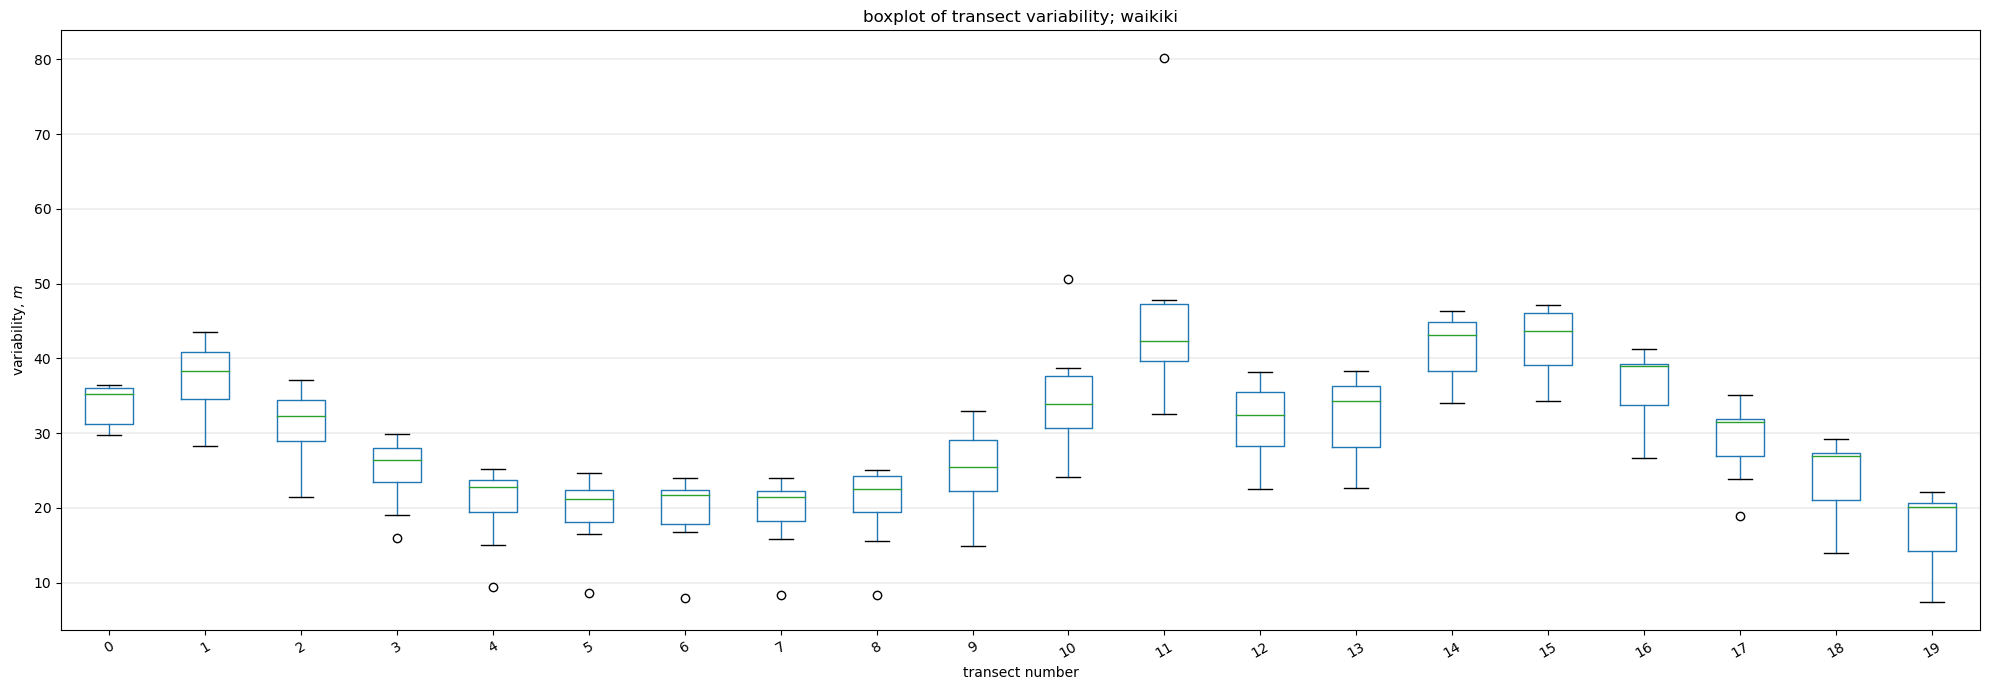

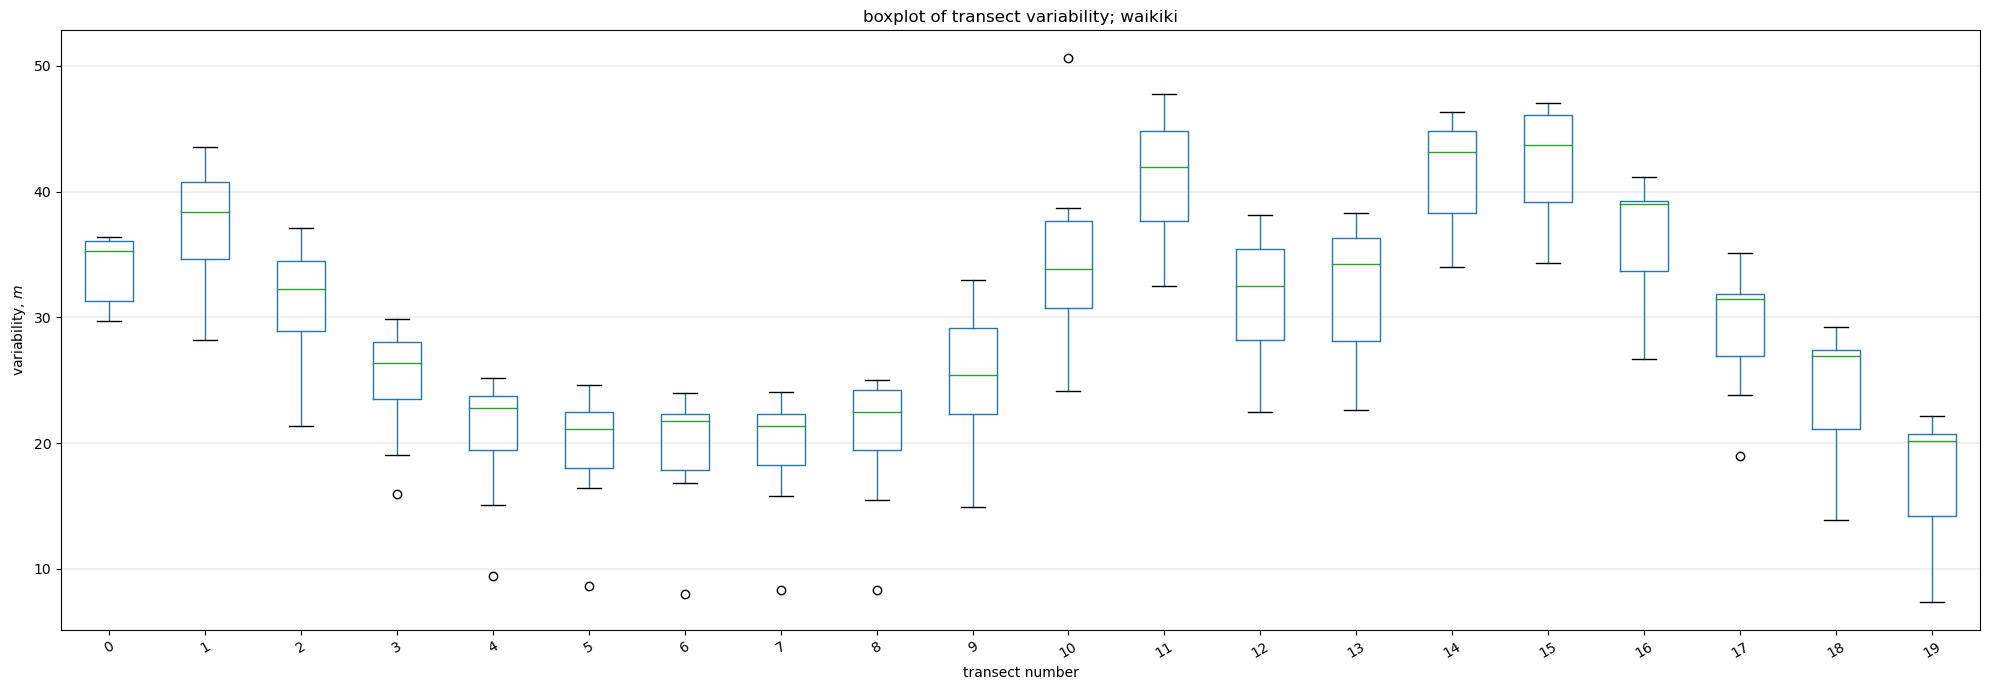

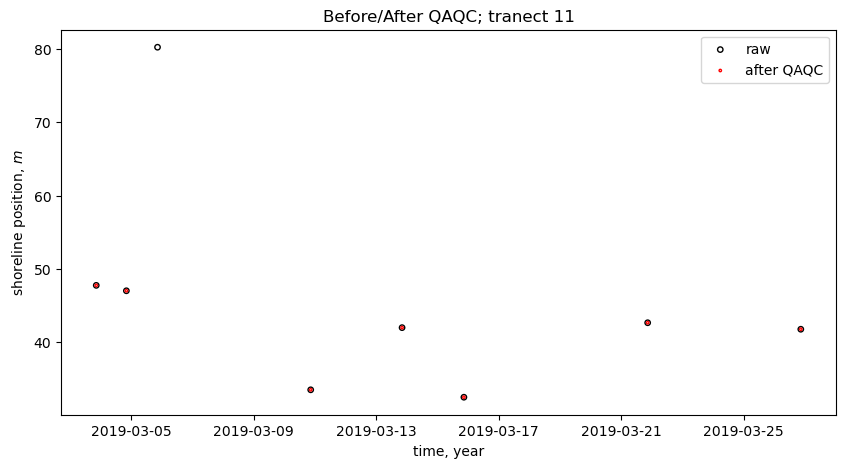

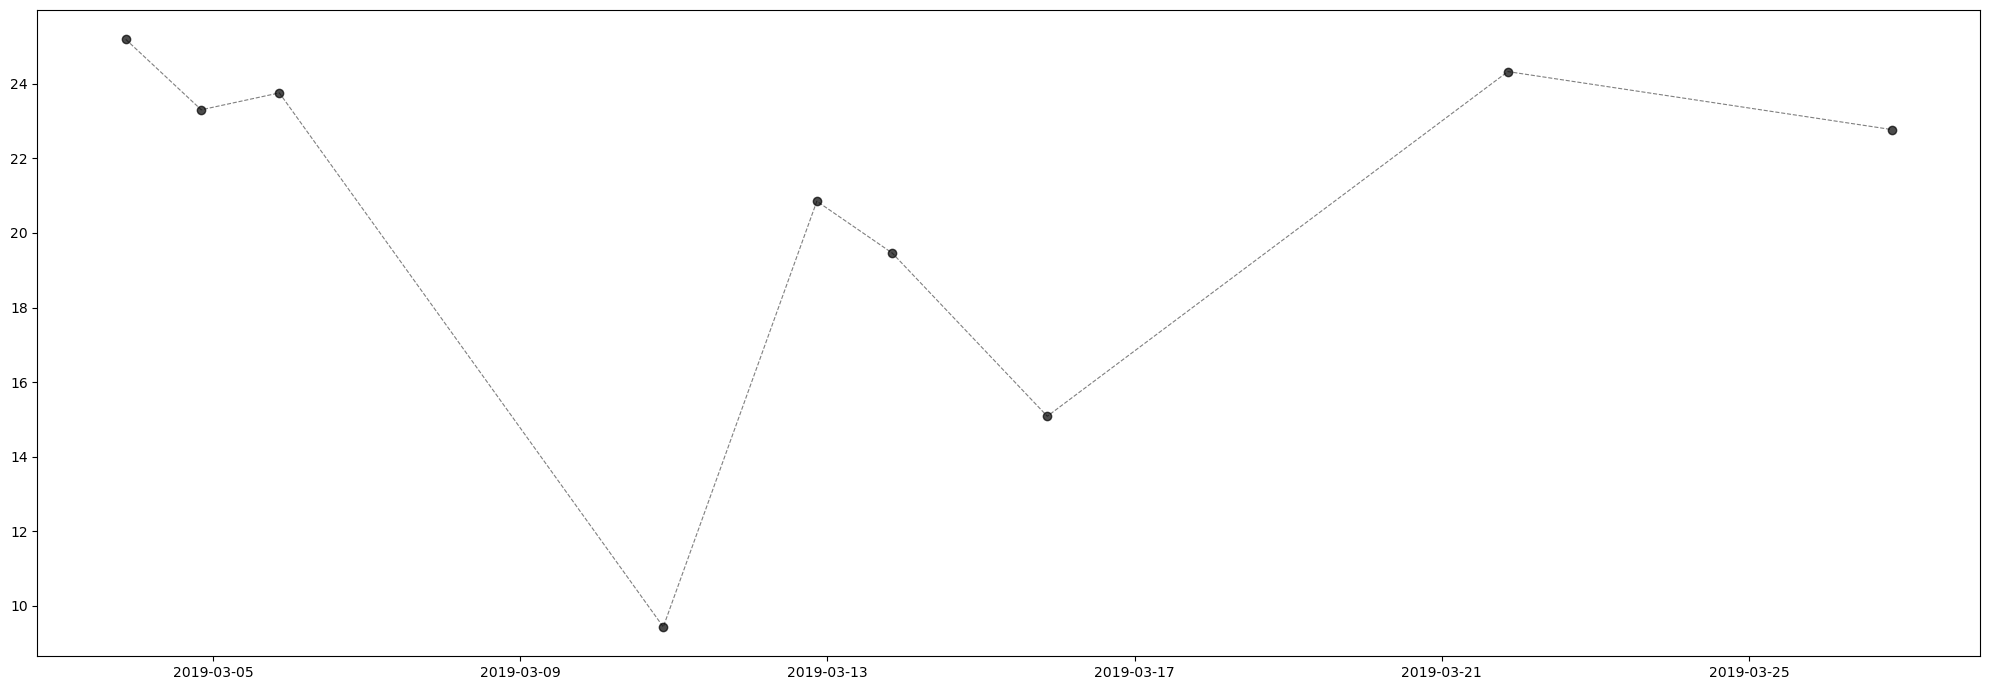

In [5]:


for sitename in sites:
    start_time = dt.datetime.now()
    print(f"{sitename} ***********************")
    siteInputs = dict()

    # ###########################################################
    # ###########             SET UP RUN              ###########
    # ###########################################################
    df = None
    if not justShorelineExtract:
        transectPath = os.path.join(os.getcwd(), 'user_inputs', region, sitename, (sitename + "_transects.geojson"))
        transects = coastvision.transects_from_geojson(transectPath)
        siteInputs['transects'] = transects
    infoJson = supportingFunctions.get_info_from_info_json(os.path.join(os.getcwd(), 'user_inputs', region, sitename,(sitename + '_info.json')))
    siteInputs['infoJson'] = infoJson
    pixelResolutions = coastvision.get_all_pixel_resolutions(region, sitename)
    user_inputsFiles = os.listdir(os.path.join(os.getcwd(), 'user_inputs', region, sitename))

    ###########################################################
    ###########             CAN WE shorten this  ?   ###########
    ###########################################################
    itemIds = set()
    for file in os.listdir(os.path.join(os.getcwd(), 'data', region, sitename)):
        if file.endswith('metadata.json'):
            # print(file)
            itemId = file.split('_metadata')[0]
            metadataJson = os.path.join(os.getcwd(), 'data', region, sitename, file)
            try:
                with open(metadataJson, 'r') as f:
                    data = json.load(f)
                pixel_size = data['properties']['pixel_resolution']
            except ValueError:
                print("JSONDecodeError Occurred and Handled")
                pixel_size = 3
            # NOTE: waiting on pixel size for now
            itemIds.add(itemId)
    n_total = len(itemIds)

    ###########################################################
    ###########           RUN COASTVISION           ###########
    ###########################################################
    intersectionDict = {}
    n=0
    ref_tif = os.path.join(os.getcwd(), 'user_inputs', region, sitename, f'{sitename}_reference.tif')
    im_ms = geospatialTools.get_im_ms(ref_tif)
    georef = geospatialTools.get_georef(ref_tif)
    siteInputs['shorelinebuff'] = coastvision.create_shoreline_buffer(region, sitename, im_shape=im_ms.shape[0:2], 
                                                    georef=georef, pixel_size=3,
                                                    max_dist=max_dist)
    for itemID in itemIds:
        n+=1
        print('\r', sitename, round(n/n_total*100,2), 'percent progress', itemID, end='', flush=True)
        # run coastvision
        intersectionDict[itemID] = coastvision.run_coastvision_single(region, sitename, itemID, siteInputs, justShorelineExtract, 
                                                                        smoothShorelineSigma, smoothWindow=None, min_sl_len=30, dataProducts=dataProducts)


    ##########################################################
    ##########      CREATE & SAVE DATAFRAME        ###########
    ##########################################################
    ## CREATE DATAFRAME
    if intersectionDict is not None:
        #create df
        df = pd.DataFrame(intersectionDict).T.astype(float)
        #fix timestamp from raw time to datetime
        df.rename(index=lambda x: pd.to_datetime(supportingFunctions.clean_timestamp(x)), inplace=True) 
        #remove rows with only nan
        df = df.dropna(axis=0, how='all')
        dfCreated = True
        outdir = os.path.join(os.getcwd(), 'outputs', region, sitename)
        df = df.sort_index() # sort index
        if not df.index.is_unique: 
            df = df.groupby(df.index).first()
        df.to_csv(os.path.join(outdir, f'{sitename}_transect_intersections.csv'))
        
    ###########################################################
    #########           POSTPROCESS DATA             ##########
    ###########################################################
        
    ### MERGE CONTOURS INTO ONE GEOJSON
    coastvision.add_all_contours_to_one_site_geojson(reg=region, sites=[sitename])

    # ### TIDAL CORRECTION   
    # coastvisionTides.tidal_correction_site(sitename, region, path_to_buffer, path_to_aviso, 
    #                                reference_elevation, plot_tide, beach_slope)
    
    # outputs = pd.read_csv(os.path.join(os.getcwd(), 'outputs', region, sitename, 
    #                                    (sitename + '_intersections_tidally_corrected_'+str(reference_elevation)+'m.csv')))
    # outputs['timestamp'] = pd.to_datetime(outputs['timestamp'])

    ### TIDAL CORRECTION
    correct_for_tides = False
    if correct_for_tides:
        coastvisionTides.tidal_correction_site(sitename, region, path_to_buffer, path_to_aviso,
                                    reference_elevation, plot_tide, beach_slope)
        outputs = pd.read_csv(os.path.join(os.getcwd(), 'outputs', region, sitename, (sitename + '_intersections_tidally_corrected_'+str(reference_elevation)+'m.csv')))
    else:
        outputs = pd.read_csv(os.path.join(outdir, f'{sitename}_transect_intersections.csv'), index_col = 0, parse_dates=True)
        outputs.index.name= 'timestamp'
        outputs.reset_index(inplace=True)


    ##################################################################
    #save plots
    fig, ax = plt.subplots(figsize=(20,7), tight_layout=True)
    outputs.iloc[:,1:].boxplot(ax=ax)
    ax.grid(axis='x', visible=None)
    ax.grid(axis='y', color='black', alpha=0.3, lw =0.3)
    ax.set_title('boxplot of transect variability; %s' %sitename)
    ax.set_ylabel('variability, $m$')
    ax.set_xlabel('transect number')
    plt.xticks(rotation=30)
    path = os.path.join(os.getcwd(), outdir, (sitename + '_boxplot_beforeQAQC.png'))
    plt.savefig(path)


    ##########################################################
    ##########            REMOVE OUTLIERS          ###########
    ##########################################################
    limit = 30
    qcDf = outputs.copy()    
    for col in qcDf.columns[1:]:
        median = np.nanmedian(outputs[col].values)
        qcDf.loc[qcDf[col] < (median - limit), col] = np.nan
        qcDf.loc[qcDf[col] > (median + limit), col] = np.nan
    print('before QAQC: shape', outputs.shape, 'number of nans', outputs.iloc[:,1:].isna().sum().sum())
    print('after QAQC: shape', qcDf.shape, 'number of nans', qcDf.iloc[:,1:].isna().sum().sum())
    path = os.path.join(outdir, (sitename + '_QAQC_transect_interesections.csv'))
    qcDf.to_csv(path)
    ## print changes:

    ##########################################################
    ##########            GENERATE PLOTS           ###########
    ##########################################################
    fig, ax = plt.subplots(figsize=(20,7), tight_layout=True)
    qcDf.iloc[:,1:].boxplot(ax=ax)
    ax.grid(axis='x', visible=None)
    ax.grid(axis='y', color='black', alpha=0.3, lw =0.3)
    ax.set_title('boxplot of transect variability; %s' %sitename)
    ax.set_ylabel('variability, $m$')
    ax.set_xlabel('transect number')
    plt.xticks(rotation=30)
    path = os.path.join(os.getcwd(), outdir, (sitename + '_boxplot_AfterQAQC_after.png'))
    plt.savefig(path)



    # Before/after QAQC
    transect = 11
    if len(df.columns)-1 <= transect:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize=(10,5))
    ax1.scatter(outputs['timestamp'], outputs.iloc[:,transect+1], s=15, facecolor='None', edgecolor='black', label = 'raw')
    ax1.scatter(qcDf['timestamp'], qcDf.iloc[:,transect+1], s=3, facecolor='None', edgecolor='red', label='after QAQC')
    ax1.set_title('Before/After QAQC; tranect %s' %transect)
    ax1.set_ylabel('shoreline position, $m$')
    ax1.set_xlabel('time, year')
    plt.legend()
    path = os.path.join(outdir, (sitename+"_before_after_QAQC.png"))
    plt.savefig(path)
    # plt.close()


    fig, ax = plt.subplots(figsize=(20,7), tight_layout=True)
    if not len(qcDf.columns) > 4:
        continue
    plt.plot(qcDf['timestamp'], qcDf['4'], 'o', ms=6, color='black', alpha=0.7)
    plt.plot(qcDf['timestamp'], qcDf['4'], lw=0.8, ls='--', color='black', alpha=0.5)


    ###########################################################
    ###########      SAVE SETTINGS IN TXT FILE       ##########
    ###########################################################  
    ########## Get info and settings 
    date = siteInputs['infoJson']['date_range']
    beach = siteInputs['infoJson']['beach_type']
    epsg = siteInputs['infoJson']['epsg']
    with open(os.path.join(outdir, 'settings.txt'), 'w') as f:
        f.write(f'\n Settings \n dataProducts: {dataProducts}  \n justShorelineExtract: {justShorelineExtract} \n smoothShorelineSigma: {smoothShorelineSigma} \n max_dist: {max_dist} \n dates: {date} \n epsg: {epsg} \n beach type: {beach}')
    
    elapsed = dt.datetime.now() - start_time
    print('DONE with', sitename, 'TOOK:', elapsed, 'to complete')

print('\n\n done \n\n')

In [ ]:
outp